# Linear Regression

In [188]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

We will generate a dataset where the relationship between the input and output is sinusoidal corrupted by some noise:

$$
\begin{equation*}
y=\sin( 2\pi x) +\epsilon
\end{equation*}
$$

Simple linear regression will just end up fitting a line. We will add powers of $x$ as new features to turn this into a "polynomial regression" problem. The data-matrix looks as follows for a power $p$:

$$
\begin{equation*}
\mathbf{X} =\begin{bmatrix}
1 & \cdots  & 1\\
x_{1} & \cdots  & x_{n}\\
x_{1}^{2} & \cdots  & x_{n}^{2}\\
\vdots  &  & \vdots \\
x_{1}^{p} & \cdots  & x_{n}^{p}
\end{bmatrix}
\end{equation*}
$$

The shape of the data-matrix is $(p + 1) \times n$. The value of $d = p + 1$. We can now continue viewing this as a linear regression problem, with respect to this data-matrix $\mathbf{X}$ and label vector $\mathbf{y}$.

In [189]:
rng = np.random.default_rng(seed = 42)
n = 20
x = np.linspace(-1, 1, n)
p = 8
X = np.array([x ** j for j in range(p + 1)])
y_true = np.sin(2 * np.pi * x)
y = y_true  + rng.normal(0, 0.2, n)
X.shape, y.shape

((9, 20), (20,))

### Visualize

Let us now visualize the dataset along with the underlying true relationship sans the noise. We expect our regression model to capture that relationship while ignoring the noise.

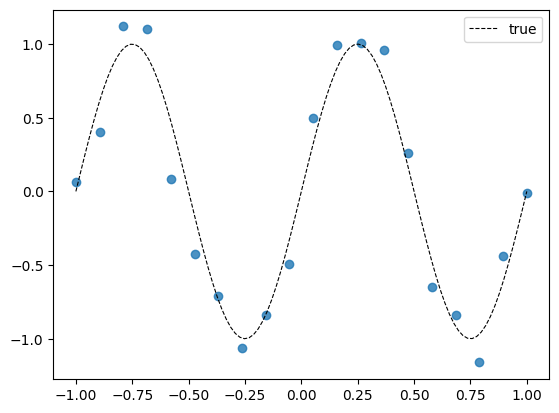

In [190]:
plt.scatter(x, y, alpha = 0.8)
x_vis = np.linspace(-1, 1, 100)
y_true_vis = np.sin(2 * np.pi * x_vis)
plt.plot(
    x_vis, y_true_vis,
    linestyle = '--',
    color = 'black',
    linewidth = 0.8,
    label = 'true'
    )
plt.legend();

## Model

The model is given by:

$$
\begin{equation*}
f(\mathbf{x}) =\mathbf{w}^{T}\mathbf{x}
\end{equation*}
$$

We can use the following function to predict the label of point.

In [191]:
def predict_point(w, x):
    return w @ x

If we need to generate predictions for an entire dataset, the expression for the vector of predictions is:

$$
\begin{equation*}
\widehat{\mathbf{y}} =\mathbf{X}^{T}\mathbf{w}
\end{equation*}
$$


In [192]:
def predict_dataset(w, X):
    return X.T @ w

## Loss function

Let us implement the following version of SSE:

$$
\begin{equation*}
L(\mathbf{X} ,\mathbf{y} ,\mathbf{w}) =\frac{1}{2}\sum\limits _{i=1}^{n}\left(\mathbf{w}^{T}\mathbf{x}_{i} -y_{i}\right)^{2} =\frac{1}{2} ||\mathbf{X}^{T}\mathbf{w} -\mathbf{y} ||^{2}
\end{equation*}
$$

In [193]:
def loss(X, y, w):
    d, n = X.shape
    err = X.T @ w - y
    return 0.5 * (err ** 2).sum()

## Normal Equations

We can now solve for the optimal weight vector by minimizing the loss function. We have a closed form solution:

$$
\begin{equation*}
\mathbf{w}^{*} =\left(\mathbf{X}^{T}\right)^{\dagger }\mathbf{y}
\end{equation*}
$$

In [194]:
w = np.linalg.pinv(X.T) @ y
w

array([  0.06185161,   6.56205128,  -0.93464463, -37.58762871,
         2.1702014 ,  55.1185918 ,  -1.55573793, -24.10820647,
         0.27400338])

### Visualize

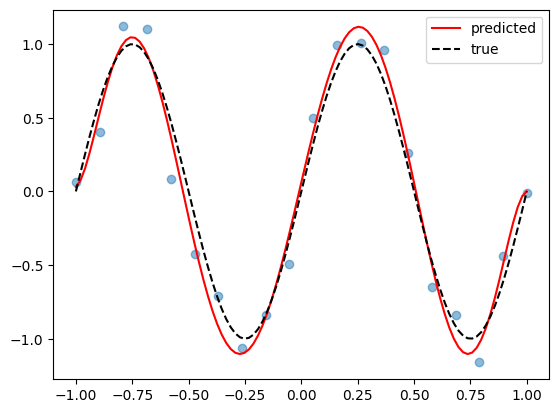

In [195]:
y_pred_vis = np.array([w[i] * (x_vis ** i)
             for i in range(w.shape[0])]).sum(axis = 0)
plt.scatter(x, y, alpha = 0.5)
plt.plot(
    x_vis, y_pred_vis,
    color = 'red',
    label = 'predicted')
plt.plot(
    x_vis, y_true_vis,
    linestyle = '--',
    color = 'black',
    label = 'true')
plt.legend();

## Gradient Descent

We can approach the optimization problem via gradient descent as well.

$$
\begin{equation*}
\mathbf{w}^{( t+1)} :=\mathbf{w}^{( t)} -\eta \nabla L\left(\mathbf{w}^{( t)} ,\mathbf{X} ,\mathbf{y}\right)
\end{equation*}
$$

We will start by initializing the weight vector to the zero vector.

### Learning rate

For linear regression, we have a theorem that states that gradient descent (with $\mathbf{w}^{(0)} = \mathbf{0}$) will converge to the solution $\left(\mathbf{X}^{T}\right)^{\dagger }\mathbf{y}$ if the learning rate chosen is in the range:

$$
\begin{equation*}
0< \eta < \frac{2}{\sigma _{1}^{2}}
\end{equation*}
$$

where $\sigma_1$ is the largest singular value of $\mathbf{X}$. To get the singular values, we can use NumPy's SVD method:

In [196]:
sigma_1 = np.linalg.svd(X)[1][0]
2 / sigma_1 ** 2

0.07400384596691363

The `svd` method returns three arrays. The one in the middle is the array of singular values arranged in descending order. The first entry of this erray is the largest singular value. Now that we have the valid range for $\eta$, let us pick some number, preferably a large one, from this range, say $\eta = 0.07$.

In [197]:
eta = 0.07

### Convergence

To decide convergence of gradient descent, we are going to keep track of the value of the loss function at every iteration. When the difference in the values of the loss function for two successive iterations falls below a certain threshold, we will terminate the learning loop. Bolstered by the theorem on the optimal learning rate for convergence, we are going to set the learning rate to a really low value, $10^{-15}$ in this case.

In [198]:
d, n = X.shape
w = np.zeros(d)
loss_hist = [np.inf, 0]
iter = 0
tol = 1e-15
# Learning loop
while abs(loss_hist[-1] - loss_hist[-2]) > tol:
    loss_hist.append(loss(X, y, w))
    grad = X @ X.T @ w - X @ y
    w -= eta * grad
    iter += 1
print(f'Converged after {iter} iterations')
print(f'Loss at convergence = {loss_hist[-1]}')
print(f'Optimal weight vector, w = {w}')

Converged after 1083114 iterations
Loss at convergence = 0.1745732684330259
Optimal weight vector, w = [  0.06184617   6.56205128  -0.93446821 -37.58762871   2.16930902
  55.1185918   -1.55430254 -24.10820647   0.27328747]


It has taken nearly 1 million iterations for convergence with learning rate and tolerance we have chosen! Let us see how close this is to the closed form solution returned by the normal equations.

In [199]:
print(w) # GD
print(np.linalg.pinv(X.T) @ y) # Normal equations
np.linalg.norm(w - np.linalg.pinv(X.T) @ y)

[  0.06184617   6.56205128  -0.93446821 -37.58762871   2.16930902
  55.1185918   -1.55430254 -24.10820647   0.27328747]
[  0.06185161   6.56205128  -0.93464463 -37.58762871   2.1702014
  55.1185918   -1.55573793 -24.10820647   0.27400338]


0.001844009550950987

We see that the two vectors are remarkably close, both by comparing the vectors element-wise and by looking at the norm of their difference!

### Loss curve

We can now plot the loss curve with the iterations.

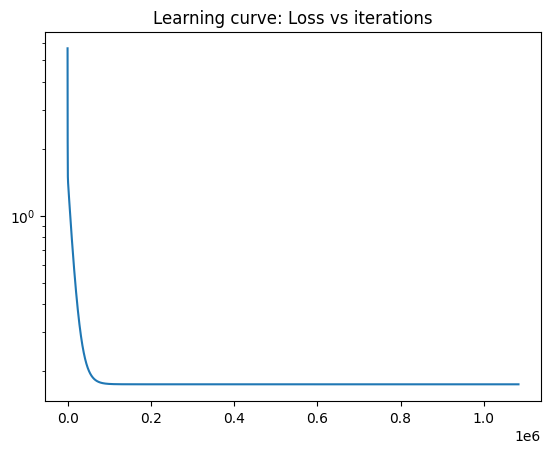

In [200]:
# skip np.inf and 0
plt.plot(range(iter), loss_hist[2:])
plt.yscale('log')
plt.title('Learning curve: Loss vs iterations');

Notice that the loss begins to plateau at around $100,000$ iterations. This is around $10\%$ of the total number of iterations. At this stage, the weight vector has already reached the bottom portion of the bowl (loss surface) and is very close to the minimum. In this region, the gradients are going to be really small. Recall that the gradient is zero at the minimum. This explains the reason it has taken about $9$ times more number of iterations to finally reach the optimum.

**CAUTION**: What we have done is not the ideal way to train ML models in practice. We have happily ignored the validation dataset. We have done it this way so as to demonstrate the key aspects of linear regression from the point of view of "curve fitting".

### Visualize

We can now visualize the curve produced by the weight vector obtained from gradient descent.

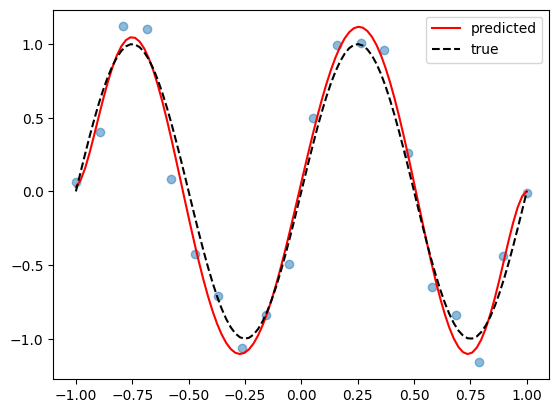

In [201]:
y_pred_vis = np.array([w[i] * (x_vis ** i)
             for i in range(w.shape[0])]).sum(axis = 0)
plt.scatter(x, y, alpha = 0.5)
plt.plot(
    x_vis, y_pred_vis,
    color = 'red',
    label = 'predicted')
plt.plot(
    x_vis, y_true_vis,
    color = 'black',
    label = 'true',
    linestyle = '--')
plt.legend();

That ends this colab on linear regression.